# Ingestion des données de régularité fournies par la SNCF pour les TGV, par liaisons

source : https://data.sncf.com/explore/dataset/regularite-mensuelle-tgv-aqst

Remarque : La régularité TGV tient compte des différentes durées de trajet des clients (aussi appelée composite).
- Un train est considéré à l'heure si son retard au terminus est inférieur à 5min pour un parcours inférieur à 1h30
- Un train est considéré à l'heure si son retard au terminus est inférieur à 10min pour un parcours entre 1h30 et 3h
- Un train est considéré à l'heure si son retard au terminus est inférieur à 15min pour un parcours au-delà de 3h


Intérêt de des données :
- pouvoir comparer les chiffres de la SNCF avec les stats issues des données fournies par l'ART (définition du retard différente)
- connaître le détail des "causes de retard" : cause externe, matériel roulant, infrastructure, gestion traffic, prise en charge voyageurs...

Lacunes de ces données :
- agrégées par mois (pas de détail par semaine, par jour ni par heure)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch

pd.options.display.max_columns = None # affiche toutes les colonnes lors de l'affichage des DataFrames
pd.options.display.float_format = '{:.2f}'.format # affiche les nombres à virgule flottante avec 2 décimales

In [26]:
df_raw = pd.read_csv("../data/1-raw/regularite-TGV/regularite-mensuelle-tgv-aqst.csv", 
                     sep=";",
                     dtype={
                         "Service": "string",
                         "Gare de départ": "string",
                         "Gare d'arrivée": "string",
                         "Commentaire annulations": "string",
                         "Commentaire retards à l'arrivée": "string",
                         "Commentaire retards au départ": "string"
                     },
                     parse_dates=["Date"])

In [27]:
df_raw.dtypes

Date                                                                                           datetime64[ns]
Service                                                                                        string[python]
Gare de départ                                                                                 string[python]
Gare d'arrivée                                                                                 string[python]
Durée moyenne du trajet                                                                                 int64
Nombre de circulations prévues                                                                          int64
Nombre de trains annulés                                                                                int64
Commentaire annulations                                                                        string[python]
Nombre de trains en retard au départ                                                                    int64
Retard moy

In [31]:
df_raw.columns

Index(['Date', 'Service', 'Gare de départ', 'Gare d'arrivée',
       'Durée moyenne du trajet', 'Nombre de circulations prévues',
       'Nombre de trains annulés', 'Commentaire annulations',
       'Nombre de trains en retard au départ',
       'Retard moyen des trains en retard au départ',
       'Retard moyen de tous les trains au départ',
       'Commentaire retards au départ',
       'Nombre de trains en retard à l'arrivée',
       'Retard moyen des trains en retard à l'arrivée',
       'Retard moyen de tous les trains à l'arrivée',
       'Commentaire retards à l'arrivée', 'Nombre trains en retard > 15min',
       'Retard moyen trains en retard > 15 (si liaison concurrencée par vol)',
       'Nombre trains en retard > 30min', 'Nombre trains en retard > 60min',
       'Prct retard pour causes externes',
       'Prct retard pour cause infrastructure',
       'Prct retard pour cause gestion trafic',
       'Prct retard pour cause matériel roulant',
       'Prct retard pour cause ges

In [28]:
df_raw

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Commentaire annulations,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Commentaire retards au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Commentaire retards à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
0,2018-01-01,National,GRENOBLE,PARIS LYON,183,245,0,<NA>,37,8.03,1.21,<NA>,23,46.31,6.12,Le 9760 heurte un chevreuil vers Le-Creusot-Mo...,25,6.12,13,6,17.65,52.94,0.00,23.53,5.88,0.00
1,2018-01-01,International,PARIS LYON,ITALIE,394,94,0,<NA>,27,11.26,3.00,<NA>,22,55.68,11.60,<NA>,22,11.60,15,6,33.33,19.05,23.81,14.29,9.52,0.00
2,2018-01-01,National,MARSEILLE ST CHARLES,LYON PART DIEU,106,557,7,<NA>,133,6.98,1.71,<NA>,60,28.92,5.20,<NA>,40,5.20,19,5,23.08,23.08,19.23,23.08,3.85,7.69
3,2018-01-01,National,PARIS NORD,DUNKERQUE,116,271,3,<NA>,46,11.24,1.80,<NA>,29,28.69,3.74,<NA>,18,3.74,9,4,35.71,28.57,7.14,25.00,3.57,0.00
4,2018-01-01,National,ANNECY,PARIS LYON,224,198,0,<NA>,12,8.07,0.49,<NA>,38,37.25,8.55,<NA>,38,8.55,14,5,23.81,42.86,9.52,14.29,4.76,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,2025-03-01,National,PARIS LYON,TOULON,236,251,1,<NA>,21,25.97,1.95,<NA>,19,47.42,5.42,<NA>,19,47.42,11,3,21.05,36.84,10.53,15.79,5.26,10.53
10683,2025-03-01,National,LYON PART DIEU,MARSEILLE ST CHARLES,105,507,1,<NA>,223,13.55,6.08,<NA>,77,37.32,6.60,<NA>,63,42.48,32,13,32.47,24.68,15.58,14.29,7.79,5.19
10684,2025-03-01,National,PARIS EST,STRASBOURG,119,679,9,<NA>,71,15.05,1.53,<NA>,64,44.18,4.57,<NA>,45,57.17,24,10,9.38,9.38,23.44,29.69,9.38,18.75
10685,2025-03-01,National,PARIS LYON,LE CREUSOT MONTCEAU MONTCHANIN,79,219,0,<NA>,18,15.74,1.12,<NA>,18,25.44,2.85,<NA>,10,36.10,5,1,5.56,27.78,11.11,22.22,11.11,22.22


In [33]:
df = df_raw.copy()

In [34]:
df["Date"].value_counts()

Date
2018-01-01    130
2018-02-01    130
2018-03-01    130
2018-04-01    130
2018-05-01    130
             ... 
2023-11-01    119
2024-06-01    119
2023-10-01    119
2023-12-01    119
2021-04-01    118
Name: count, Length: 87, dtype: int64

In [39]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

# EDA rapide 

In [42]:
"""
colonnes disponibles :

'Date' : année et mois
'year'
'month'

'Service' : National ou International

'Gare de départ'
'Gare d'arrivée'

'Durée moyenne du trajet'

'Nombre de circulations prévues'
'Nombre de trains annulés' 
'Commentaire annulations'

'Nombre de trains en retard au départ'
'Retard moyen des trains en retard au départ'
'Retard moyen de tous les trains au départ'
'Commentaire retards au départ'

'Nombre de trains en retard à l'arrivée'
'Retard moyen des trains en retard à l'arrivée'
'Retard moyen de tous les trains à l'arrivée'
'Commentaire retards à l'arrivée'

'Nombre trains en retard > 15min'
'Retard moyen trains en retard > 15 (si liaison concurrencée par vol)'
'Nombre trains en retard > 30min'
'Nombre trains en retard > 60min'

'Prct retard pour causes externes'
'Prct retard pour cause infrastructure'
'Prct retard pour cause gestion trafic'
'Prct retard pour cause matériel roulant'
'Prct retard pour cause gestion en gare et réutilisation de matériel'
'Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)'
"""

"\ncolonnes disponibles :\n\n'Date' : année et mois\n'year'\n'month'\n\n'Service' : National ou International\n\n'Gare de départ'\n'Gare d'arrivée'\n\n'Durée moyenne du trajet'\n\n'Nombre de circulations prévues'\n'Nombre de trains annulés' \n'Commentaire annulations'\n\n'Nombre de trains en retard au départ'\n'Retard moyen des trains en retard au départ'\n'Retard moyen de tous les trains au départ'\n'Commentaire retards au départ'\n\n'Nombre de trains en retard à l'arrivée'\n'Retard moyen des trains en retard à l'arrivée'\n'Retard moyen de tous les trains à l'arrivée'\n'Commentaire retards à l'arrivée'\n\n'Nombre trains en retard > 15min'\n'Retard moyen trains en retard > 15 (si liaison concurrencée par vol)'\n'Nombre trains en retard > 30min'\n'Nombre trains en retard > 60min'\n\n'Prct retard pour causes externes'\n'Prct retard pour cause infrastructure'\n'Prct retard pour cause gestion trafic'\n'Prct retard pour cause matériel roulant'\n'Prct retard pour cause gestion en gare et réu

In [97]:
# Analyse des causes de retards : 

df_2024 = df[df['year'] == 2024].copy()

df_2024['nb_circ'] = df_2024["Nombre de circulations prévues"] - df_2024["Nombre de trains annulés"]

df_2024['retard_cause_externe_pondéré'] = df_2024["Prct retard pour causes externes"] * df_2024["nb_circ"]
df_2024['retard_cause_infra_pondéré'] = df_2024["Prct retard pour cause infrastructure"] * df_2024["nb_circ"]
df_2024['retard_cause_trafic_pondéré'] = df_2024["Prct retard pour cause gestion trafic"] * df_2024["nb_circ"]
df_2024['retard_cause_materiel_pondéré'] = df_2024["Prct retard pour cause matériel roulant"] * df_2024["nb_circ"]
df_2024['retard_cause_gestion_pondéré'] = df_2024["Prct retard pour cause gestion en gare et réutilisation de matériel"] * df_2024["nb_circ"]
df_2024['retard_cause_voyageurs_pondéré'] = df_2024["Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"] * df_2024["nb_circ"]

df_mensuel_2024 = df_2024.groupby("Date").agg(
    nb_circ=("nb_circ", "sum"),
    nb_retards=("Nombre de trains en retard à l'arrivée", "sum"),
    retard_cause_externe_pondéré=("retard_cause_externe_pondéré", "sum"),
    retard_cause_infra_pondéré=("retard_cause_infra_pondéré", "sum"),
    retard_cause_trafic_pondéré=("retard_cause_trafic_pondéré", "sum"),
    retard_cause_materiel_pondéré=("retard_cause_materiel_pondéré", "sum"),
    retard_cause_gestion_pondéré=("retard_cause_gestion_pondéré", "sum"),
    retard_cause_voyageurs_pondéré=("retard_cause_voyageurs_pondéré", "sum")
).assign(
    retard_cause_externe_pondéré=lambda x: x["retard_cause_externe_pondéré"] / x["nb_circ"],
    retard_cause_infra_pondéré=lambda x: x["retard_cause_infra_pondéré"] / x["nb_circ"],
    retard_cause_trafic_pondéré=lambda x: x["retard_cause_trafic_pondéré"] / x["nb_circ"],
    retard_cause_materiel_pondéré=lambda x: x["retard_cause_materiel_pondéré"] / x["nb_circ"],
    retard_cause_gestion_pondéré=lambda x: x["retard_cause_gestion_pondéré"] / x["nb_circ"],
    retard_cause_voyageurs_pondéré=lambda x: x["retard_cause_voyageurs_pondéré"] / x["nb_circ"]
)

df_mensuel_2024["somme_causes_retard_verif"] = (
    df_mensuel_2024["retard_cause_externe_pondéré"] +
    df_mensuel_2024["retard_cause_infra_pondéré"] +
    df_mensuel_2024["retard_cause_trafic_pondéré"] +
    df_mensuel_2024["retard_cause_materiel_pondéré"] +
    df_mensuel_2024["retard_cause_gestion_pondéré"] +
    df_mensuel_2024["retard_cause_voyageurs_pondéré"]
) # ça devrait faire 100%. ok c'est presque 100

df_mensuel_2024["label"] = ['Jan', 'Fev', 'Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Aout', 'Sept', 'Oct', 'Nov', 'Dec']

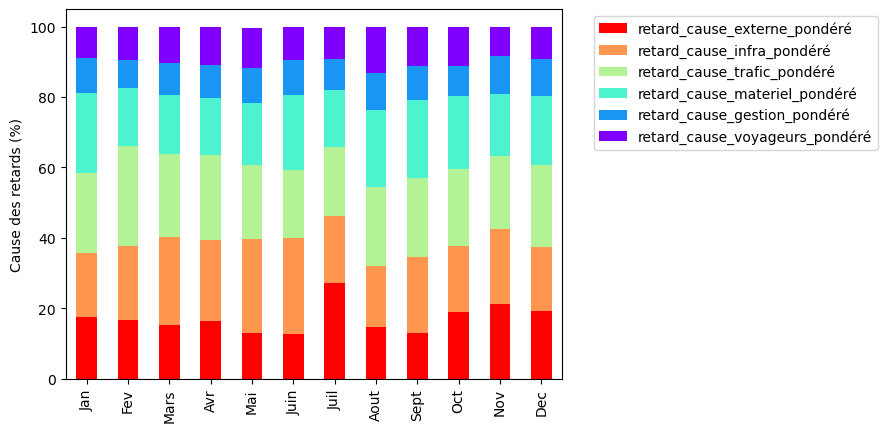

In [95]:
# Cause des retards (barplot empilé à 100%)
colors = plt.cm.rainbow(np.linspace(1, 0, 6))
df_mensuel_2024.plot(kind='bar', 
                     stacked=True, 
                     y=['retard_cause_externe_pondéré', 
                        'retard_cause_infra_pondéré',
                        'retard_cause_trafic_pondéré',
                        'retard_cause_materiel_pondéré',
                        'retard_cause_gestion_pondéré',
                        'retard_cause_voyageurs_pondéré'],
                    color=colors)
plt.gca().set_xticks(range(len(df_mensuel_2024["label"])))
plt.gca().set_xticklabels(df_mensuel_2024["label"])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("")
plt.ylabel("Cause des retards (%)")
plt.show()

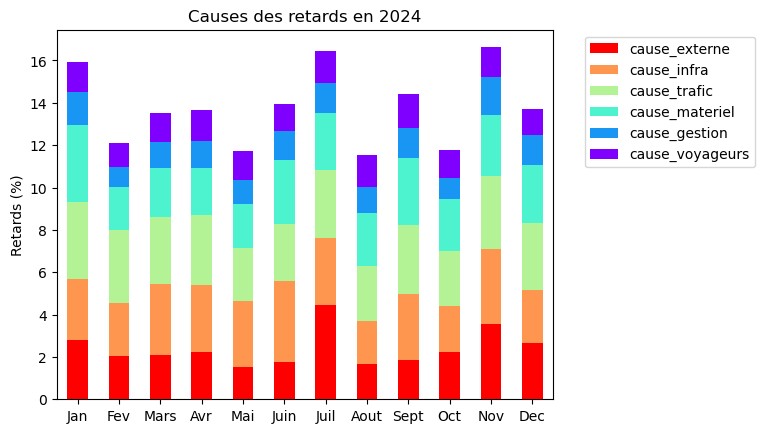

In [112]:
# Cause des retards (barplot de hauteur proportionnelle au % de trains en retard)
df_mensuel_2024['cause_externe'] = df_mensuel_2024['retard_cause_externe_pondéré'] * (df_mensuel_2024['nb_retards'] / df_mensuel_2024['nb_circ'])
df_mensuel_2024['cause_infra'] =  df_mensuel_2024['retard_cause_infra_pondéré'] * (df_mensuel_2024['nb_retards'] / df_mensuel_2024['nb_circ'])
df_mensuel_2024['cause_trafic'] = df_mensuel_2024['retard_cause_trafic_pondéré'] * (df_mensuel_2024['nb_retards'] / df_mensuel_2024['nb_circ'])
df_mensuel_2024['cause_materiel'] = df_mensuel_2024['retard_cause_materiel_pondéré'] * (df_mensuel_2024['nb_retards'] / df_mensuel_2024['nb_circ'])
df_mensuel_2024['cause_gestion'] = df_mensuel_2024['retard_cause_gestion_pondéré'] * (df_mensuel_2024['nb_retards'] / df_mensuel_2024['nb_circ'])
df_mensuel_2024['cause_voyageurs'] = df_mensuel_2024['retard_cause_voyageurs_pondéré'] * (df_mensuel_2024['nb_retards'] / df_mensuel_2024['nb_circ'])



colors = plt.cm.rainbow(np.linspace(1, 0, 6))
df_mensuel_2024.plot(kind='bar', 
                     stacked=True, 
                     x = "label",
                     y=['cause_externe', 
                        'cause_infra',
                        'cause_trafic',
                        'cause_materiel',
                        'cause_gestion',
                        'cause_voyageurs'],
                    color=colors)
plt.xticks(rotation=0, ha='center')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("")
plt.ylabel("Retards (%)")
plt.title("Causes des retards en 2024")
plt.show()
